## Preprocessing

### Import Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install --upgrade PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/tweets_PDIP.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,User,tweet,Link Tweet
0,0,2023-03-22 22:44:19+00:00,moreshare,"Heran, #PDIP Kok Setuju Gerakan Tolak Timnas I...",https://twitter.com/moreshare/status/163867298...
1,1,2023-03-22 20:31:28+00:00,TheUncleDee,Inilah Bentuk ketidakmampuan serta Ketakutan #...,https://twitter.com/TheUncleDee/status/1638639...
2,2,2023-03-22 15:18:20+00:00,CelahId,PDI Perjuangan Jawa Timur tegas menolak kedata...,https://twitter.com/CelahId/status/16385607482...
3,3,2023-03-22 15:10:01+00:00,MilenialSamaAH,Pertemuan Golkar dan Partai Bulan Bintang\r\n\...,https://twitter.com/MilenialSamaAH/status/1638...
4,4,2023-03-22 01:25:20+00:00,fajaronline,"Singgung Mahfud MD, Legislator PDIP Beber Anca...",https://twitter.com/fajaronline/status/1638351...


### Case Folding

In [ ]:
df['tweet'] = df['tweet'].str.lower()

In [ ]:
df['tweet'].head()

0    heran, #pdip kok setuju gerakan tolak timnas i...
1    inilah bentuk ketidakmampuan serta ketakutan #...
2    pdi perjuangan jawa timur tegas menolak kedata...
3    pertemuan golkar dan partai bulan bintang\r\n\...
4    singgung mahfud md, legislator pdip beber anca...
Name: tweet, dtype: object

### Tokenizing

In [ ]:
import string
import re #untuk regular expression

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
#remove unnneccesary characters
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [ ]:
df['tweet'] = df['tweet'].apply(remove_tweet_special)
df['tweet'] = df['tweet'].apply(remove_number)
df['tweet'] = df['tweet'].apply(remove_punctuation)
df['tweet'] = df['tweet'].apply(remove_whitespace_LT)
df['tweet'] = df['tweet'].apply(remove_whitespace_multiple)
df['tweet'] = df['tweet'].apply(remove_singl_char)
df = df[~df['tweet'].duplicated(keep='first')]
df = df[df['tweet'].notna()]
df.dropna(subset=['tweet'], inplace=True)

In [ ]:
df['tokenized_tweet'] = df['tweet'].apply(word_tokenize_wrapper)

In [ ]:
df[['tweet','tokenized_tweet']].head()

,tweet,tokenized_tweet
0,heran kok setuju gerakan tolak timnas israel,"[heran, kok, setuju, gerakan, tolak, timnas, i..."
1,inilah bentuk ketidakmampuan serta ketakutan f...,"[inilah, bentuk, ketidakmampuan, serta, ketaku..."
2,pdi perjuangan jawa timur tegas menolak kedata...,"[pdi, perjuangan, jawa, timur, tegas, menolak,..."
3,pertemuan golkar dan partai bulan bintang,"[pertemuan, golkar, dan, partai, bulan, bintang]"
4,singgung mahfud md legislator pdip beber ancam...,"[singgung, mahfud, md, legislator, pdip, beber..."


In [ ]:
def freqDist_wrapper(text):
    return FreqDist(text)

df['tokenized_freq'] = df['tokenized_tweet'].apply(freqDist_wrapper)


In [ ]:
print(df['tokenized_freq'].head().apply(lambda x : x.most_common()))

0    [(heran, 1), (kok, 1), (setuju, 1), (gerakan, ...
1    [(inilah, 1), (bentuk, 1), (ketidakmampuan, 1)...
2    [(jawa, 2), (timur, 2), (di, 2), (pdi, 1), (pe...
3    [(pertemuan, 1), (golkar, 1), (dan, 1), (parta...
4    [(singgung, 1), (mahfud, 1), (md, 1), (legisla...
Name: tokenized_freq, dtype: object


### Stopword Removal

In [ ]:
tweet_data = df[['tweet', 'tokenized_tweet', 'tokenized_freq']]

In [ ]:
tweet_data.head()

,tweet,tokenized_tweet,tokenized_freq
0,heran kok setuju gerakan tolak timnas israel,"[heran, kok, setuju, gerakan, tolak, timnas, i...","{'heran': 1, 'kok': 1, 'setuju': 1, 'gerakan':..."
1,inilah bentuk ketidakmampuan serta ketakutan f...,"[inilah, bentuk, ketidakmampuan, serta, ketaku...","{'inilah': 1, 'bentuk': 1, 'ketidakmampuan': 1..."
2,pdi perjuangan jawa timur tegas menolak kedata...,"[pdi, perjuangan, jawa, timur, tegas, menolak,...","{'pdi': 1, 'perjuangan': 1, 'jawa': 2, 'timur'..."
3,pertemuan golkar dan partai bulan bintang,"[pertemuan, golkar, dan, partai, bulan, bintang]","{'pertemuan': 1, 'golkar': 1, 'dan': 1, 'parta..."
4,singgung mahfud md legislator pdip beber ancam...,"[singgung, mahfud, md, legislator, pdip, beber...","{'singgung': 1, 'mahfud': 1, 'md': 1, 'legisla..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopword indonesia from NTLK library
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# stopword from file
# File didapat dari link : 
# https://github.com/pebbie/pebahasa/blob/master/indonesian
# https://github.com/aliakbars/bilp/blob/master/stoplist
txt_stopword = pd.read_csv("/content/drive/MyDrive/NLP Project/id.stopwords.02.01.2016.txt", names= ["stopwords"], header = None)

# add stopword from file to list_stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
tweet_data['stopword_applied'] = tweet_data['tokenized_tweet'].apply(stopwords_removal)

<ipython-input-25-9ee99cc668c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['stopword_applied'] = tweet_data['tokenized_tweet'].apply(stopwords_removal)


In [ ]:
tweet_data[['tokenized_tweet', 'stopword_applied']].head()

,tokenized_tweet,stopword_applied
0,"[heran, kok, setuju, gerakan, tolak, timnas, i...","[heran, setuju, gerakan, tolak, timnas, israel]"
1,"[inilah, bentuk, ketidakmampuan, serta, ketaku...","[bentuk, ketidakmampuan, ketakutan, fight, kor..."
2,"[pdi, perjuangan, jawa, timur, tegas, menolak,...","[pdi, perjuangan, jawa, timur, menolak, kedata..."
3,"[pertemuan, golkar, dan, partai, bulan, bintang]","[pertemuan, golkar, partai, bintang]"
4,"[singgung, mahfud, md, legislator, pdip, beber...","[singgung, mahfud, md, legislator, pdip, beber..."


### Normalisasi

In [ ]:
# mengganti kata alay/non formal ke kata standar baku
# list slang dapat dari : https://medium.com/@arie.pratama.s/bahasa-indonesia-open-sourced-nlp-resources-8cb394193238

kamusalay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
kamusalay[['slang', 'formal']].head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
katabaku_dict = {}

for index, row in kamusalay.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1]

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]


In [ ]:
tweet_data['baku_tweet'] = tweet_data['stopword_applied'].apply(normalized_term)

<ipython-input-31-9d4fbaed2a60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['baku_tweet'] = tweet_data['stopword_applied'].apply(normalized_term)


In [ ]:
tweet_data[['tokenized_tweet', 'stopword_applied', 'baku_tweet']].head()

,tokenized_tweet,stopword_applied,baku_tweet
0,"[heran, kok, setuju, gerakan, tolak, timnas, i...","[heran, setuju, gerakan, tolak, timnas, israel]","[heran, setuju, gerakan, tolak, timnas, israel]"
1,"[inilah, bentuk, ketidakmampuan, serta, ketaku...","[bentuk, ketidakmampuan, ketakutan, fight, kor...","[bentuk, ketidakmampuan, ketakutan, fight, kor..."
2,"[pdi, perjuangan, jawa, timur, tegas, menolak,...","[pdi, perjuangan, jawa, timur, menolak, kedata...","[pdi, perjuangan, jawa, timur, menolak, kedata..."
3,"[pertemuan, golkar, dan, partai, bulan, bintang]","[pertemuan, golkar, partai, bintang]","[pertemuan, golkar, partai, bintang]"
4,"[singgung, mahfud, md, legislator, pdip, beber...","[singgung, mahfud, md, legislator, pdip, beber...","[singgung, mahfud, md, legislator, pdip, beber..."


### Stemming

In [ ]:
!pip install --upgrade swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=dcb457f6bb789da55991406391c7fc1bcdc22dd2bc71a7c90b332e30366b034e
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet_data['baku_tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '



for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

# tweet_data['stemmed_tweet'] = tweet_data['baku_tweet'].swifter.apply(get_stemmed_term)
tweet_data.loc[:, 'stemmed_tweet'] = tweet_data['baku_tweet'].swifter.apply(get_stemmed_term)

Pandas Apply:   0%|          | 0/26783 [00:00<?, ?it/s]

<ipython-input-34-ddb78ca3af4b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data.loc[:, 'stemmed_tweet'] = tweet_data['baku_tweet'].swifter.apply(get_stemmed_term)


In [ ]:
tweet_data['stemmed_tweet'].head()

0           [heran, tuju, gera, tolak, timnas, israel]
1    [bentuk, ketidakmampuan, takut, fight, korupsi...
2    [pdi, juang, jawa, timur, tolak, datang, deleg...
3                      [temu, golkar, partai, bintang]
4    [singgung, mahfud, md, legislator, pdip, beber...
Name: stemmed_tweet, dtype: object

In [ ]:
# save dataset sementara
tweet_data.to_csv("/content/drive/MyDrive/NLP Project/Text_Preprocessing_notinclude_tfidf.csv")

### TF-IDF

# referensi tf-idf : https://medium.com/@yunusmuhammad007/tf-idf-term-frequency-inverse-document-frequency-representasi-vector-data-text-2a4eff56cda

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/Text_Preprocessing_notinclude_tfidf.csv")

In [ ]:
df.head()

,Unnamed: 0,tweet,tokenized_tweet,tokenized_freq,stopword_applied,baku_tweet,stemmed_tweet
0,0,heran kok setuju gerakan tolak timnas israel,"['heran', 'kok', 'setuju', 'gerakan', 'tolak',...",<FreqDist with 7 samples and 7 outcomes>,"['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'tuju', 'gera', 'tolak', 'timnas', '..."
1,1,inilah bentuk ketidakmampuan serta ketakutan f...,"['inilah', 'bentuk', 'ketidakmampuan', 'serta'...",<FreqDist with 15 samples and 15 outcomes>,"['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['bentuk', 'ketidakmampuan', 'takut', 'fight',..."
2,2,pdi perjuangan jawa timur tegas menolak kedata...,"['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...",<FreqDist with 16 samples and 19 outcomes>,"['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'juang', 'jawa', 'timur', 'tolak', 'da..."
3,3,pertemuan golkar dan partai bulan bintang,"['pertemuan', 'golkar', 'dan', 'partai', 'bula...",<FreqDist with 6 samples and 6 outcomes>,"['pertemuan', 'golkar', 'partai', 'bintang']","['pertemuan', 'golkar', 'partai', 'bintang']","['temu', 'golkar', 'partai', 'bintang']"
4,4,singgung mahfud md legislator pdip beber ancam...,"['singgung', 'mahfud', 'md', 'legislator', 'pd...",<FreqDist with 12 samples and 12 outcomes>,"['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd..."


In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df['tweet_list'] = df['stemmed_tweet'].apply(convert_text_list)

In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict


In [ ]:
df["TF_dict"] = df['tweet_list'].apply(calc_TF)

df["TF_dict"].head()
df["TF_dict"]

0        {'heran': 0.16666666666666666, 'tuju': 0.16666...
1        {'bentuk': 0.125, 'ketidakmampuan': 0.125, 'ta...
2        {'pdi': 0.06666666666666667, 'juang': 0.066666...
3        {'temu': 0.25, 'golkar': 0.25, 'partai': 0.25,...
4        {'singgung': 0.09090909090909091, 'mahfud': 0....
                               ...                        
26778    {'tahapantahapan': 0.25, 'mungut': 0.25, 'suar...
26779    {'abang': 0.14285714285714285, 'moncong': 0.14...
26780    {'pilih': 0.1, 'depan': 0.2, 'mata': 0.1, 'ban...
26781    {'partai': 0.1111111111111111, 'ideologis': 0....
26782    {'ayo': 0.3333333333333333, 'pilih': 0.3333333...
Name: TF_dict, Length: 26783, dtype: object

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF


In [ ]:
DFresult = calc_DF(df["TF_dict"])

In [ ]:
# calc idf
n_document = len(df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict


In [ ]:
#Stores the idf dictionary
IDFresult = calc_IDF(n_document, DFresult)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFresult[key]
    return TF_IDF_Dict


In [ ]:
df["TF-IDF_dict"] = df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
new_positive_word = pd.read_csv('/content/drive/MyDrive/NLP Project/unique_positive.txt')
new_negative_word = pd.read_csv('/content/drive/MyDrive/NLP Project/unique_negative.txt')
kata_positive = new_positive_word['ahli'].tolist()
kata_negative = new_negative_word['inkonsisten'].tolist()

In [ ]:
# calc tf-idf total for positive word
def calc_positive(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_positive:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
# calc tf-idf total for positive word
def calc_negative(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_negative:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
df["TF-IDF_positive"] = df["TF-IDF_dict"].apply(calc_positive)
df["TF-IDF_negative"] = df["TF-IDF_dict"].apply(calc_negative)

In [ ]:
conditions = [
    (df['TF-IDF_positive'] < df['TF-IDF_negative']),
    (df['TF-IDF_positive'] > df['TF-IDF_negative']),
    (df['TF-IDF_positive'] == df['TF-IDF_negative'])]
choices = ['negative','positive','neutral']

df['status'] = np.select(conditions, choices)

In [ ]:
df.head()
df

,Unnamed: 0,tweet,tokenized_tweet,tokenized_freq,stopword_applied,baku_tweet,stemmed_tweet,tweet_list,TF_dict,TF-IDF_dict,TF-IDF_positive,TF-IDF_negative,status
0,0,heran kok setuju gerakan tolak timnas israel,"['heran', 'kok', 'setuju', 'gerakan', 'tolak',...",<FreqDist with 7 samples and 7 outcomes>,"['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'setuju', 'gerakan', 'tolak', 'timna...","['heran', 'tuju', 'gera', 'tolak', 'timnas', '...","[heran, tuju, gera, tolak, timnas, israel]","{'heran': 0.16666666666666666, 'tuju': 0.16666...","{'heran': 0.9960024886155466, 'tuju': 0.850295...",0.996002,0.000000,positive
1,1,inilah bentuk ketidakmampuan serta ketakutan f...,"['inilah', 'bentuk', 'ketidakmampuan', 'serta'...",<FreqDist with 15 samples and 15 outcomes>,"['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['bentuk', 'ketidakmampuan', 'ketakutan', 'fig...","['bentuk', 'ketidakmampuan', 'takut', 'fight',...","[bentuk, ketidakmampuan, takut, fight, korupsi...","{'bentuk': 0.125, 'ketidakmampuan': 0.125, 'ta...","{'bentuk': 0.6377215545078281, 'ketidakmampuan...",1.342806,2.038321,negative
2,2,pdi perjuangan jawa timur tegas menolak kedata...,"['pdi', 'perjuangan', 'jawa', 'timur', 'tegas'...",<FreqDist with 16 samples and 19 outcomes>,"['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'perjuangan', 'jawa', 'timur', 'menola...","['pdi', 'juang', 'jawa', 'timur', 'tolak', 'da...","[pdi, juang, jawa, timur, tolak, datang, deleg...","{'pdi': 0.06666666666666667, 'juang': 0.066666...","{'pdi': 0.20917497996383536, 'juang': 0.162907...",1.392570,0.162908,positive
3,3,pertemuan golkar dan partai bulan bintang,"['pertemuan', 'golkar', 'dan', 'partai', 'bula...",<FreqDist with 6 samples and 6 outcomes>,"['pertemuan', 'golkar', 'partai', 'bintang']","['pertemuan', 'golkar', 'partai', 'bintang']","['temu', 'golkar', 'partai', 'bintang']","[temu, golkar, partai, bintang]","{'temu': 0.25, 'golkar': 0.25, 'partai': 0.25,...","{'temu': 1.0160740368465615, 'golkar': 1.10680...",1.707057,0.000000,positive
4,4,singgung mahfud md legislator pdip beber ancam...,"['singgung', 'mahfud', 'md', 'legislator', 'pd...",<FreqDist with 12 samples and 12 outcomes>,"['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","['singgung', 'mahfud', 'md', 'legislator', 'pd...","[singgung, mahfud, md, legislator, pdip, beber...","{'singgung': 0.09090909090909091, 'mahfud': 0....","{'singgung': 0.49550822804601247, 'mahfud': 0....",0.000000,2.088024,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26778,40795,ini tahapantahapan pemungutan suara di tps,"['ini', 'tahapantahapan', 'pemungutan', 'suara...",<FreqDist with 6 samples and 6 outcomes>,"['tahapantahapan', 'pemungutan', 'suara', 'tps']","['tahapantahapan', 'pemungutan', 'suara', 'tps']","['tahapantahapan', 'mungut', 'suara', 'tps']","[tahapantahapan, mungut, suara, tps]","{'tahapantahapan': 0.25, 'mungut': 0.25, 'suar...","{'tahapantahapan': 2.2023070689373743, 'mungut...",0.970494,0.000000,positive
26779,40796,yakin abang moncong putih amp setan merah unit...,"['yakin', 'abang', 'moncong', 'putih', 'amp', ...",<FreqDist with 9 samples and 9 outcomes>,"['abang', 'moncong', 'putih', 'setan', 'merah'...","['abang', 'moncong', 'putih', 'setan', 'merah'...","['abang', 'moncong', 'putih', 'setan', 'merah'...","[abang, moncong, putih, setan, merah, united, ...","{'abang': 0.14285714285714285, 'moncong': 0.14...","{'abang': 1.101516569583055, 'moncong': 0.9259...",0.479282,1.749108,negative
26780,40797,pemilihan umum di dpn mata masa depan bangsa t...,"['pemilihan', 'umum', 'di', 'dpn', 'mata', 'ma...",<FreqDist with 19 samples and 20 outcomes>,"['pemilihan', 'dpn', 'mata', 'bangsa', 'thn', ...","['pemilihan', 'depan', 'mata', 'bangsa', 'tahu...","['pilih', 'depan', 'mata', 'bangsa', 'tahun', ...","[pilih, depan, mata, bangsa, tahun, depan, ten...","{'pilih': 0.1, 'depan': 0.2, 'mata': 0.1, 'ban...","{'pilih': 0.35465380868446

In [ ]:
df.to_csv("/content/drive/MyDrive/NLP Project/Text_Preprocessing_complete.csv")

### Pembagian Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/Text_Preprocessing_complete.csv")

In [ ]:
df.dropna(subset=['tweet'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26782 entries, 0 to 26782
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      26782 non-null  int64  
 1   Unnamed: 0        26782 non-null  int64  
 2   tweet             26782 non-null  object 
 3   tokenized_tweet   26782 non-null  object 
 4   tokenized_freq    26782 non-null  object 
 5   stopword_applied  26782 non-null  object 
 6   baku_tweet        26782 non-null  object 
 7   stemmed_tweet     26782 non-null  object 
 8   tweet_list        26782 non-null  object 
 9   TF_dict           26782 non-null  object 
 10  TF-IDF_dict       26782 non-null  object 
 11  TF-IDF_positive   26782 non-null  float64
 12  TF-IDF_negative   26782 non-null  float64
 13  status            26782 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
tweet               0
tokenized_tweet     0
tokenized_freq      0
stopword_applied    0
baku_tweet          0
stemmed_tweet       0
tweet_list          0
TF_dict             0
TF-IDF_dict         0
TF-IDF_positive     0
TF-IDF_negative     0
status              0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
df.iloc[:, 2]

0             heran kok setuju gerakan tolak timnas israel
1        inilah bentuk ketidakmampuan serta ketakutan f...
2        pdi perjuangan jawa timur tegas menolak kedata...
3                pertemuan golkar dan partai bulan bintang
4        singgung mahfud md legislator pdip beber ancam...
                               ...                        
26778           ini tahapantahapan pemungutan suara di tps
26779    yakin abang moncong putih amp setan merah unit...
26780    pemilihan umum di dpn mata masa depan bangsa t...
26781    partai yg ideologis nya stabil dari dulu sampe...
26782                          ayo memilih untuk indonesia
Name: tweet, Length: 26782, dtype: object

In [ ]:
tf_vector = get_feature_vector(np.array(df.iloc[:, 8]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 8]).ravel())
y = np.array(df.iloc[:, 13]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
df.status.value_counts()

positive    12320
negative    11080
neutral      3382
Name: status, dtype: int64

## Implementasi

### Logistic Regression

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix

#### Inisiasi Model

Pada bagian awal, dilakukan pemodelan dengan bentuk inisialisasi tanpa pengaturan sama sekali.

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=5000)

In [ ]:
scoreLR = cross_val_score(modelLR, x_train, y_train, cv=10)

In [ ]:
print(scoreLR)
print(np.mean(scoreLR))

[0.84695147 0.84529241 0.84280382 0.82282158 0.82904564 0.8340249
 0.84439834 0.84647303 0.85684647 0.83360996]
0.8402267615063049


In [ ]:
modelLR.fit(x_train,y_train)
y_predLR_init = modelLR.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_predLR_init),"\n")
print(classification_report(y_test,y_predLR_init))

[[1000   16  123]
 [  70  208   63]
 [ 110   11 1078]] 

              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      1139
     neutral       0.89      0.61      0.72       341
    positive       0.85      0.90      0.88      1199

    accuracy                           0.85      2679
   macro avg       0.86      0.80      0.82      2679
weighted avg       0.85      0.85      0.85      2679



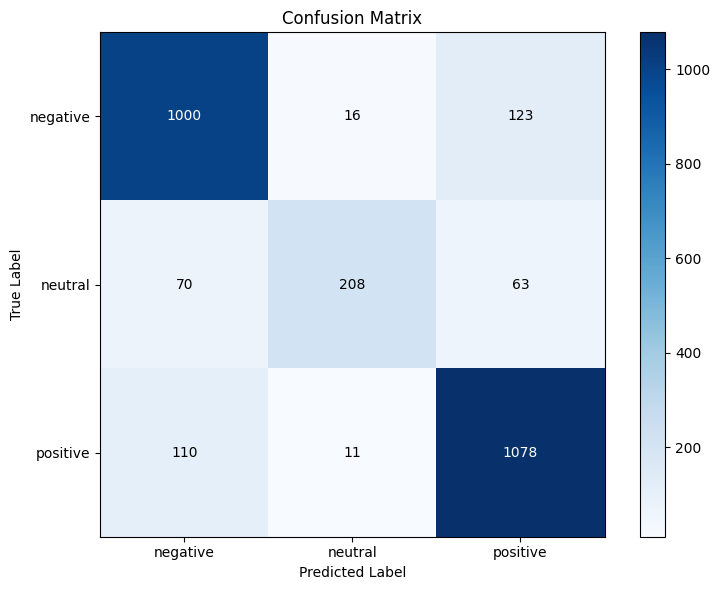

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_predLR_init)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

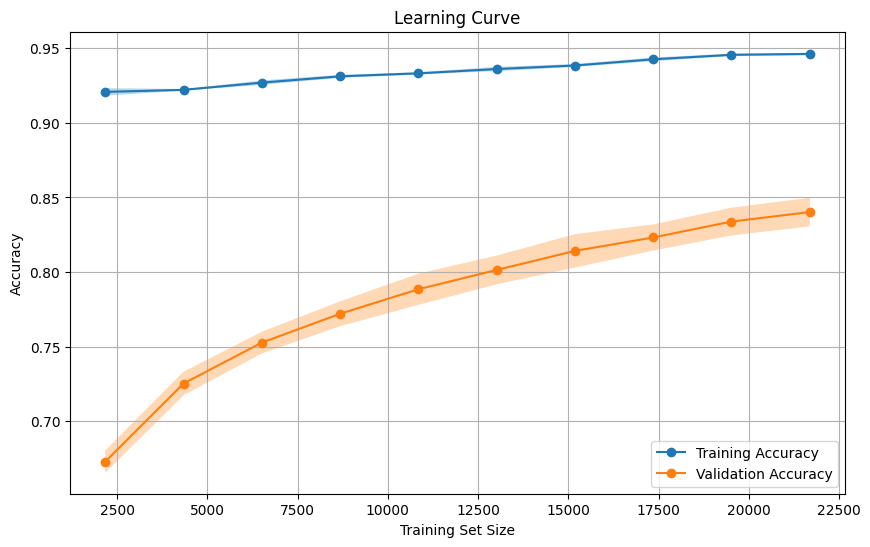

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    # Calculate mean and standard deviation of train scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.3)
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.3)
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Create an instance of LogisticRegression
modelLR = LogisticRegression(max_iter=5000)

# Plot the learning curve
plot_learning_curve(modelLR, x_train, y_train, cv=10, train_sizes=train_sizes)

In [ ]:
import seaborn as sns

<Axes: xlabel='status', ylabel='count'>

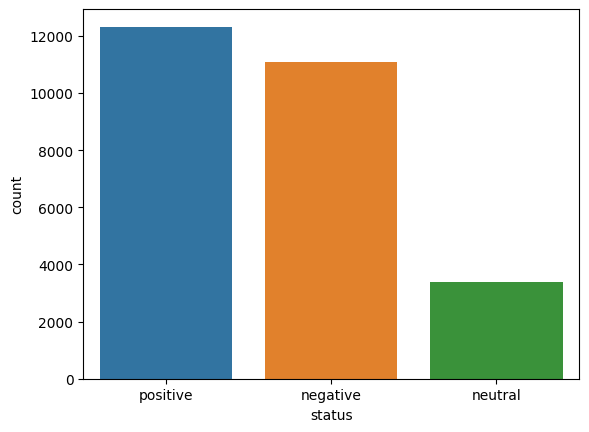

In [ ]:
sns.countplot(data =df, x = "status")